# 1. Regression Part

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import pickle
from scipy.stats import zscore
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('avocado.csv')

# DATA PRE PROCESSING

In [3]:
data.shape

(18249, 14)

below data has 18249 row's of data, 13 features and 1 label 

In [4]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


quick preview of the data

In [5]:
data.drop('Unnamed: 0',axis=1,inplace=True)

deleting unwanted column

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


handling datetime data

In [7]:
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
wd_mapping = {0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'}

In [9]:
month_mapping = {1:'January',
                2:'February',
                3:'March',
                4:'April',
                5:'May',
                6:'June',
                7:'July',
                8:'August',
                9:'September',
                10:'October',
                11:'November',
                12:'December'}

In [10]:
data['day of the week'] = data['Date'].dt.weekday.map(wd_mapping)

In [11]:
data['month'] = data['Date'].dt.month.map(month_mapping)

In [12]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,day of the week,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,Sunday,December
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,Sunday,December
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,Sunday,December
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,Sunday,December
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,Sunday,November


In [13]:
data.drop('Date',axis=1,inplace=True)

In [14]:
data.shape

(18249, 14)

In [15]:
data.isna().sum()

AveragePrice       0
Total Volume       0
4046               0
4225               0
4770               0
Total Bags         0
Small Bags         0
Large Bags         0
XLarge Bags        0
type               0
year               0
region             0
day of the week    0
month              0
dtype: int64

no missing values

In [16]:
data.drop_duplicates(inplace=True)

In [17]:
data.shape

(18249, 14)

no duplicate data present

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AveragePrice     18249 non-null  float64
 1   Total Volume     18249 non-null  float64
 2   4046             18249 non-null  float64
 3   4225             18249 non-null  float64
 4   4770             18249 non-null  float64
 5   Total Bags       18249 non-null  float64
 6   Small Bags       18249 non-null  float64
 7   Large Bags       18249 non-null  float64
 8   XLarge Bags      18249 non-null  float64
 9   type             18249 non-null  object 
 10  year             18249 non-null  int64  
 11  region           18249 non-null  object 
 12  day of the week  18249 non-null  object 
 13  month            18249 non-null  object 
dtypes: float64(9), int64(1), object(4)
memory usage: 2.1+ MB


In [19]:
cat_data = data.select_dtypes(['object']).columns.tolist()

In [20]:
cont_data = data.select_dtypes(['float64','int64']).columns.tolist()

In [21]:
cat_data

['type', 'region', 'day of the week', 'month']

In [22]:
cont_data

['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'year']

In [23]:
cont_data = cont_data[1:]

In [24]:
cont_data

['Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'year']

# EDA

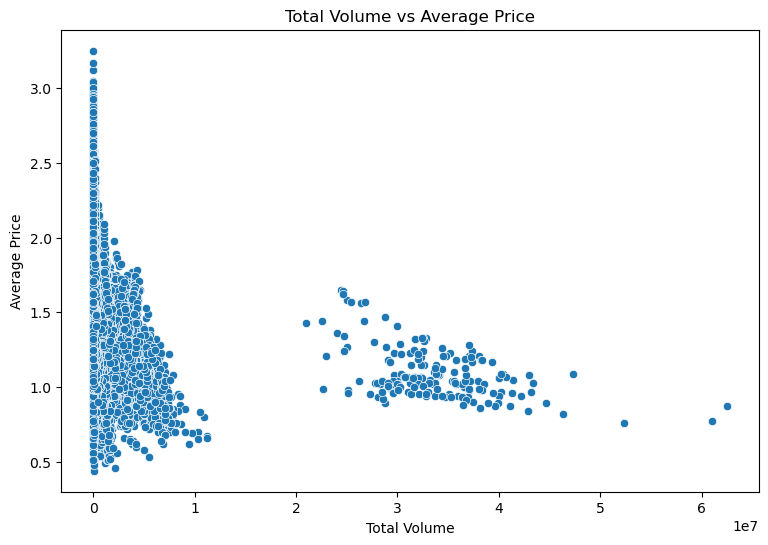

In [25]:
plt.figure(figsize=(9,6))

sns.scatterplot(x = data['Total Volume'],y=data['AveragePrice'])

plt.title('Total Volume vs Average Price')

plt.xlabel('Total Volume')

plt.ylabel("Average Price")

plt.show()

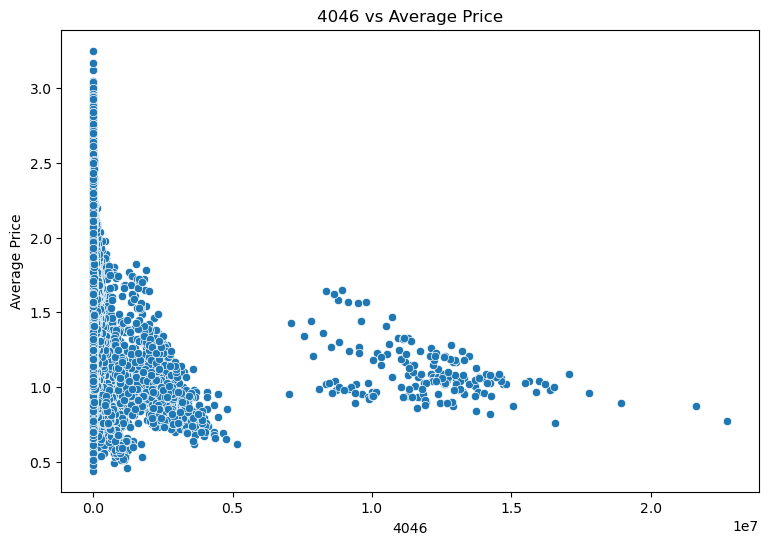

In [26]:
plt.figure(figsize=(9,6))

sns.scatterplot(x = data['4046'],y=data['AveragePrice'])

plt.title('4046 vs Average Price')

plt.xlabel('4046')

plt.ylabel("Average Price")

plt.show()

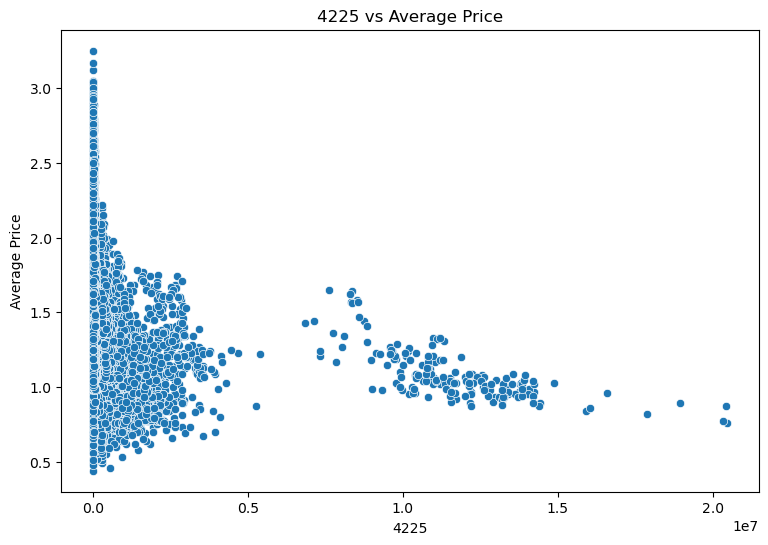

In [27]:
plt.figure(figsize=(9,6))

sns.scatterplot(x = data['4225'],y=data['AveragePrice'])

plt.title('4225 vs Average Price')

plt.xlabel('4225')

plt.ylabel("Average Price")

plt.show()

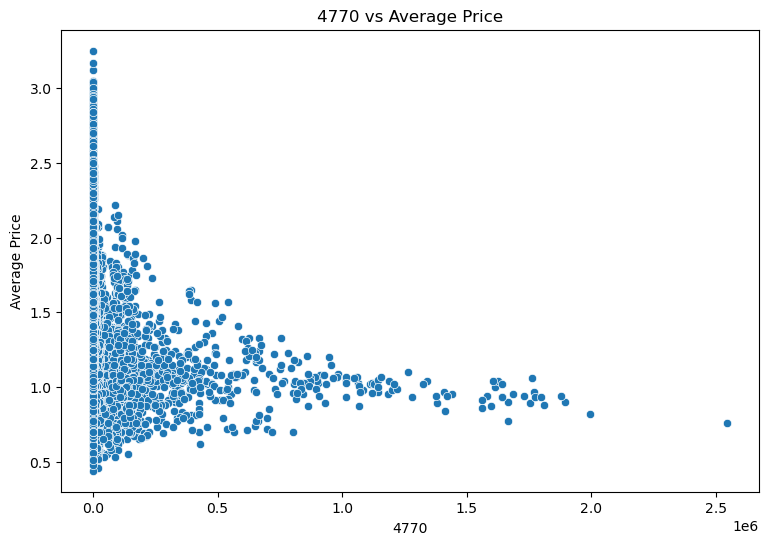

In [28]:
plt.figure(figsize=(9,6))

sns.scatterplot(x = data['4770'],y=data['AveragePrice'])

plt.title('4770 vs Average Price')

plt.xlabel('4770')

plt.ylabel("Average Price")

plt.show()

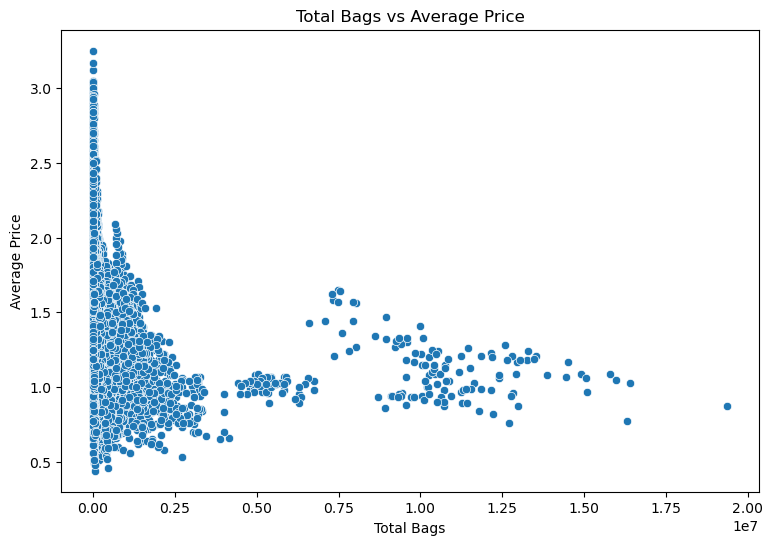

In [29]:
plt.figure(figsize=(9,6))

sns.scatterplot(x = data['Total Bags'],y=data['AveragePrice'])

plt.title('Total Bags vs Average Price')

plt.xlabel('Total Bags')

plt.ylabel("Average Price")

plt.show()

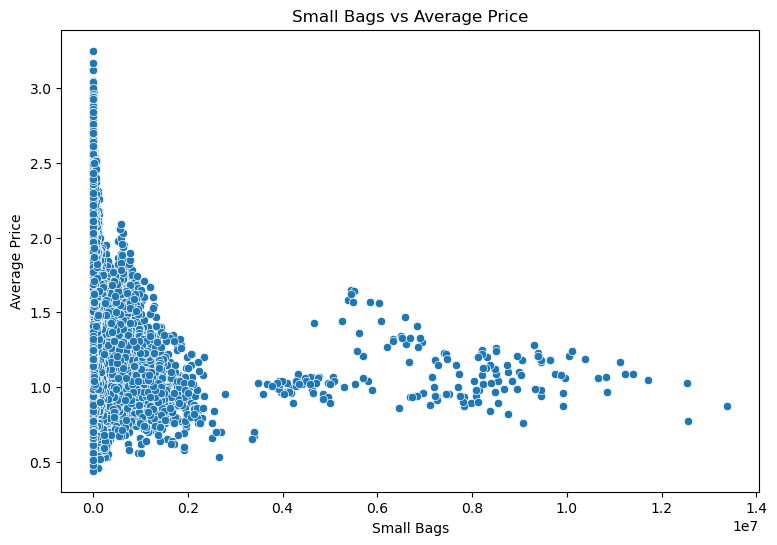

In [30]:
plt.figure(figsize=(9,6))

sns.scatterplot(x = data['Small Bags'],y=data['AveragePrice'])

plt.title('Small Bags vs Average Price')

plt.xlabel('Small Bags')

plt.ylabel("Average Price")

plt.show()

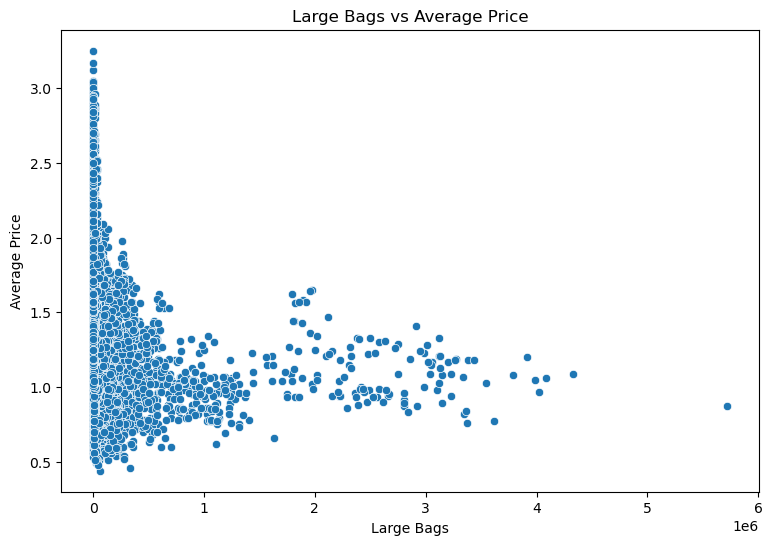

In [31]:
plt.figure(figsize=(9,6))

sns.scatterplot(x = data['Large Bags'],y=data['AveragePrice'])

plt.title('Large Bags vs Average Price')

plt.xlabel('Large Bags')

plt.ylabel("Average Price")

plt.show()

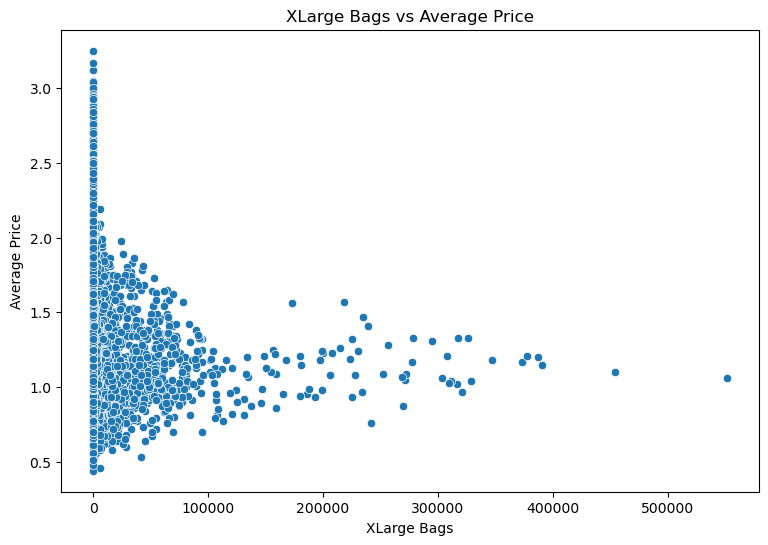

In [32]:
plt.figure(figsize=(9,6))

sns.scatterplot(x = data['XLarge Bags'],y=data['AveragePrice'])

plt.title('XLarge Bags vs Average Price')

plt.xlabel('XLarge Bags')

plt.ylabel("Average Price")

plt.show()

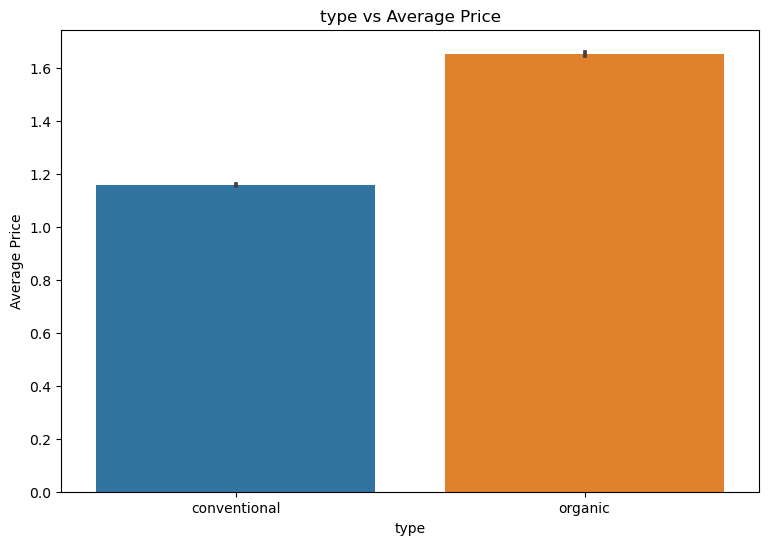

In [33]:
plt.figure(figsize=(9,6))

sns.barplot(x = data['type'],y=data['AveragePrice'])

plt.title('type vs Average Price')

plt.xlabel('type')

plt.ylabel("Average Price")

plt.show()

avg price of organic is high compared to conventional

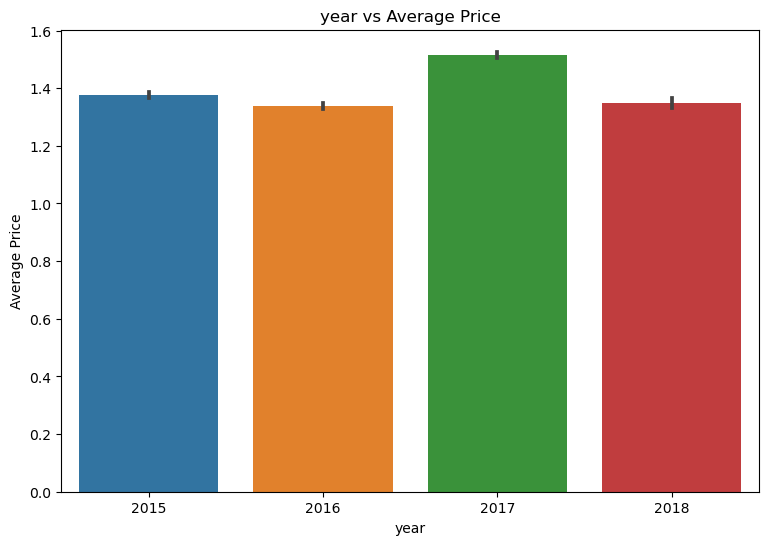

In [34]:
plt.figure(figsize=(9,6))

sns.barplot(x = data['year'],y=data['AveragePrice'])

plt.title('year vs Average Price')

plt.xlabel('year')

plt.ylabel("Average Price")

plt.show()

avg price was highest in year 2017 and lowest in 2016

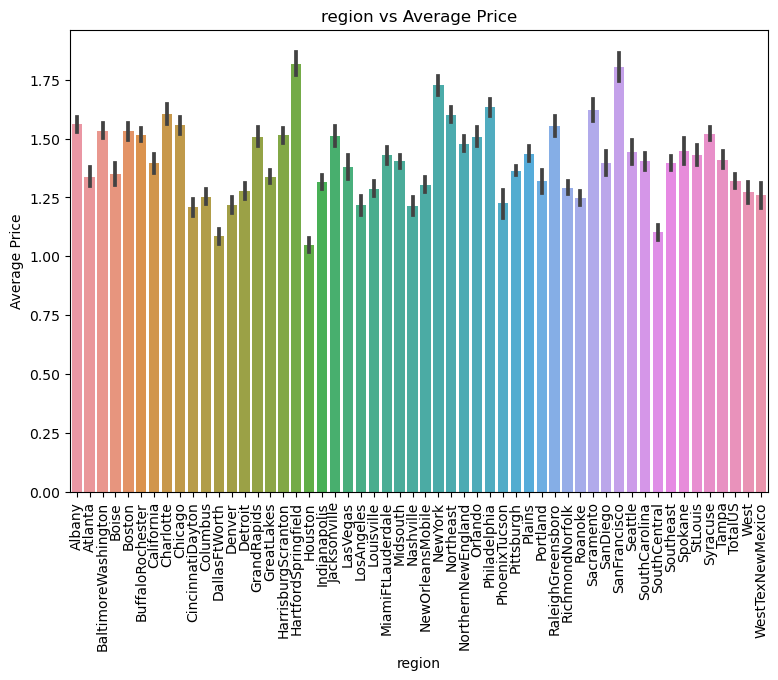

In [35]:
plt.figure(figsize=(9,6))

sns.barplot(x = data['region'],y=data['AveragePrice'])

plt.title('region vs Average Price')

plt.xlabel('region')

plt.xticks(rotation=90)

plt.ylabel("Average Price")

plt.show()

price is highest in Hartford Springfield and lowest in Houston

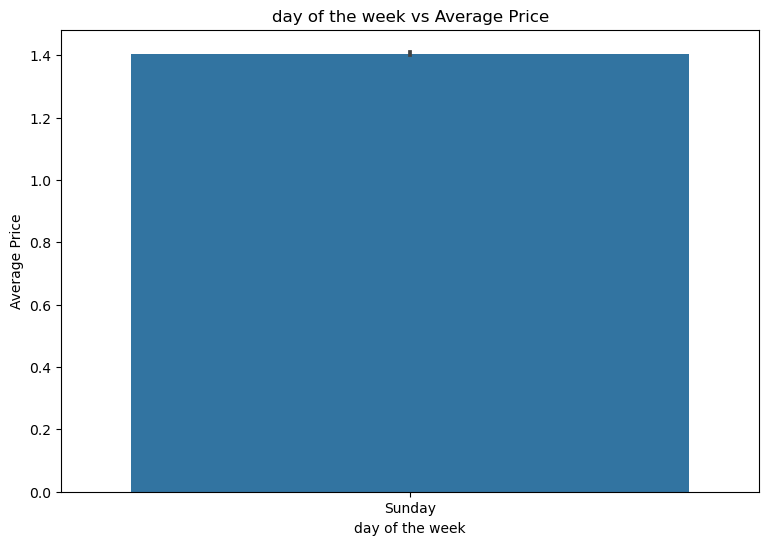

In [36]:
plt.figure(figsize=(9,6))

sns.barplot(x = data['day of the week'],y=data['AveragePrice'])

plt.title('day of the week vs Average Price')

plt.xlabel('day of the week')

plt.ylabel("Average Price")

plt.show()

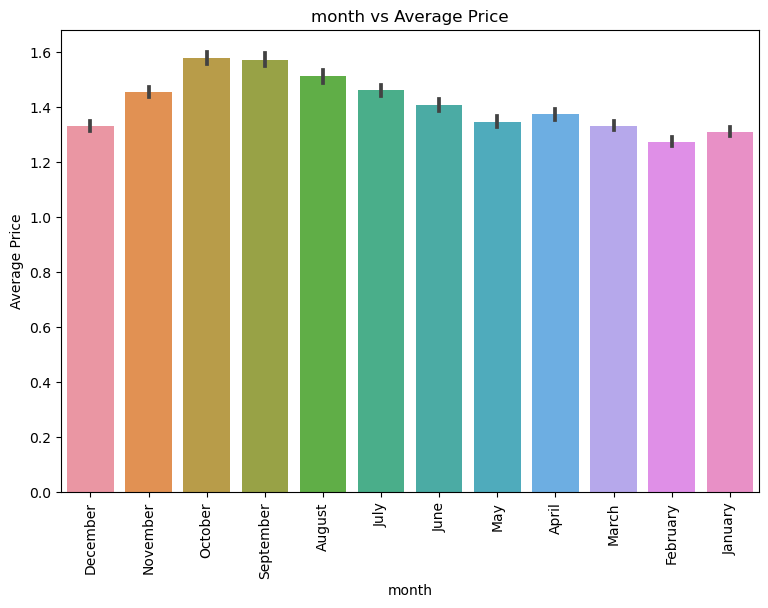

In [37]:
plt.figure(figsize=(9,6))

sns.barplot(x = data['month'],y=data['AveragePrice'])

plt.title('month vs Average Price')

plt.xlabel('month')

plt.xticks(rotation=90)

plt.ylabel("Average Price")

plt.show()

the price is highest for month's october and september respectively

In [38]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,day of the week,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,Sunday,December
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,Sunday,December
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,Sunday,December
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,Sunday,December
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,Sunday,November


In [39]:
le = LabelEncoder()

In [40]:
#data['type'] = le.fit_transform(data['type'])

In [41]:
#data['region'] = le.fit_transform(data['region'])

In [42]:
#data['day of the week'] = le.fit_transform(data['day of the week'])

In [43]:
#data['month'] = le.fit_transform(data['month'])

since day of the week column has 0 variance we can drop the column from our data

In [44]:
data.drop('day of the week',axis=1,inplace=True)

In [45]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,December
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,December
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,December
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,December
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,November


checking for data distribution

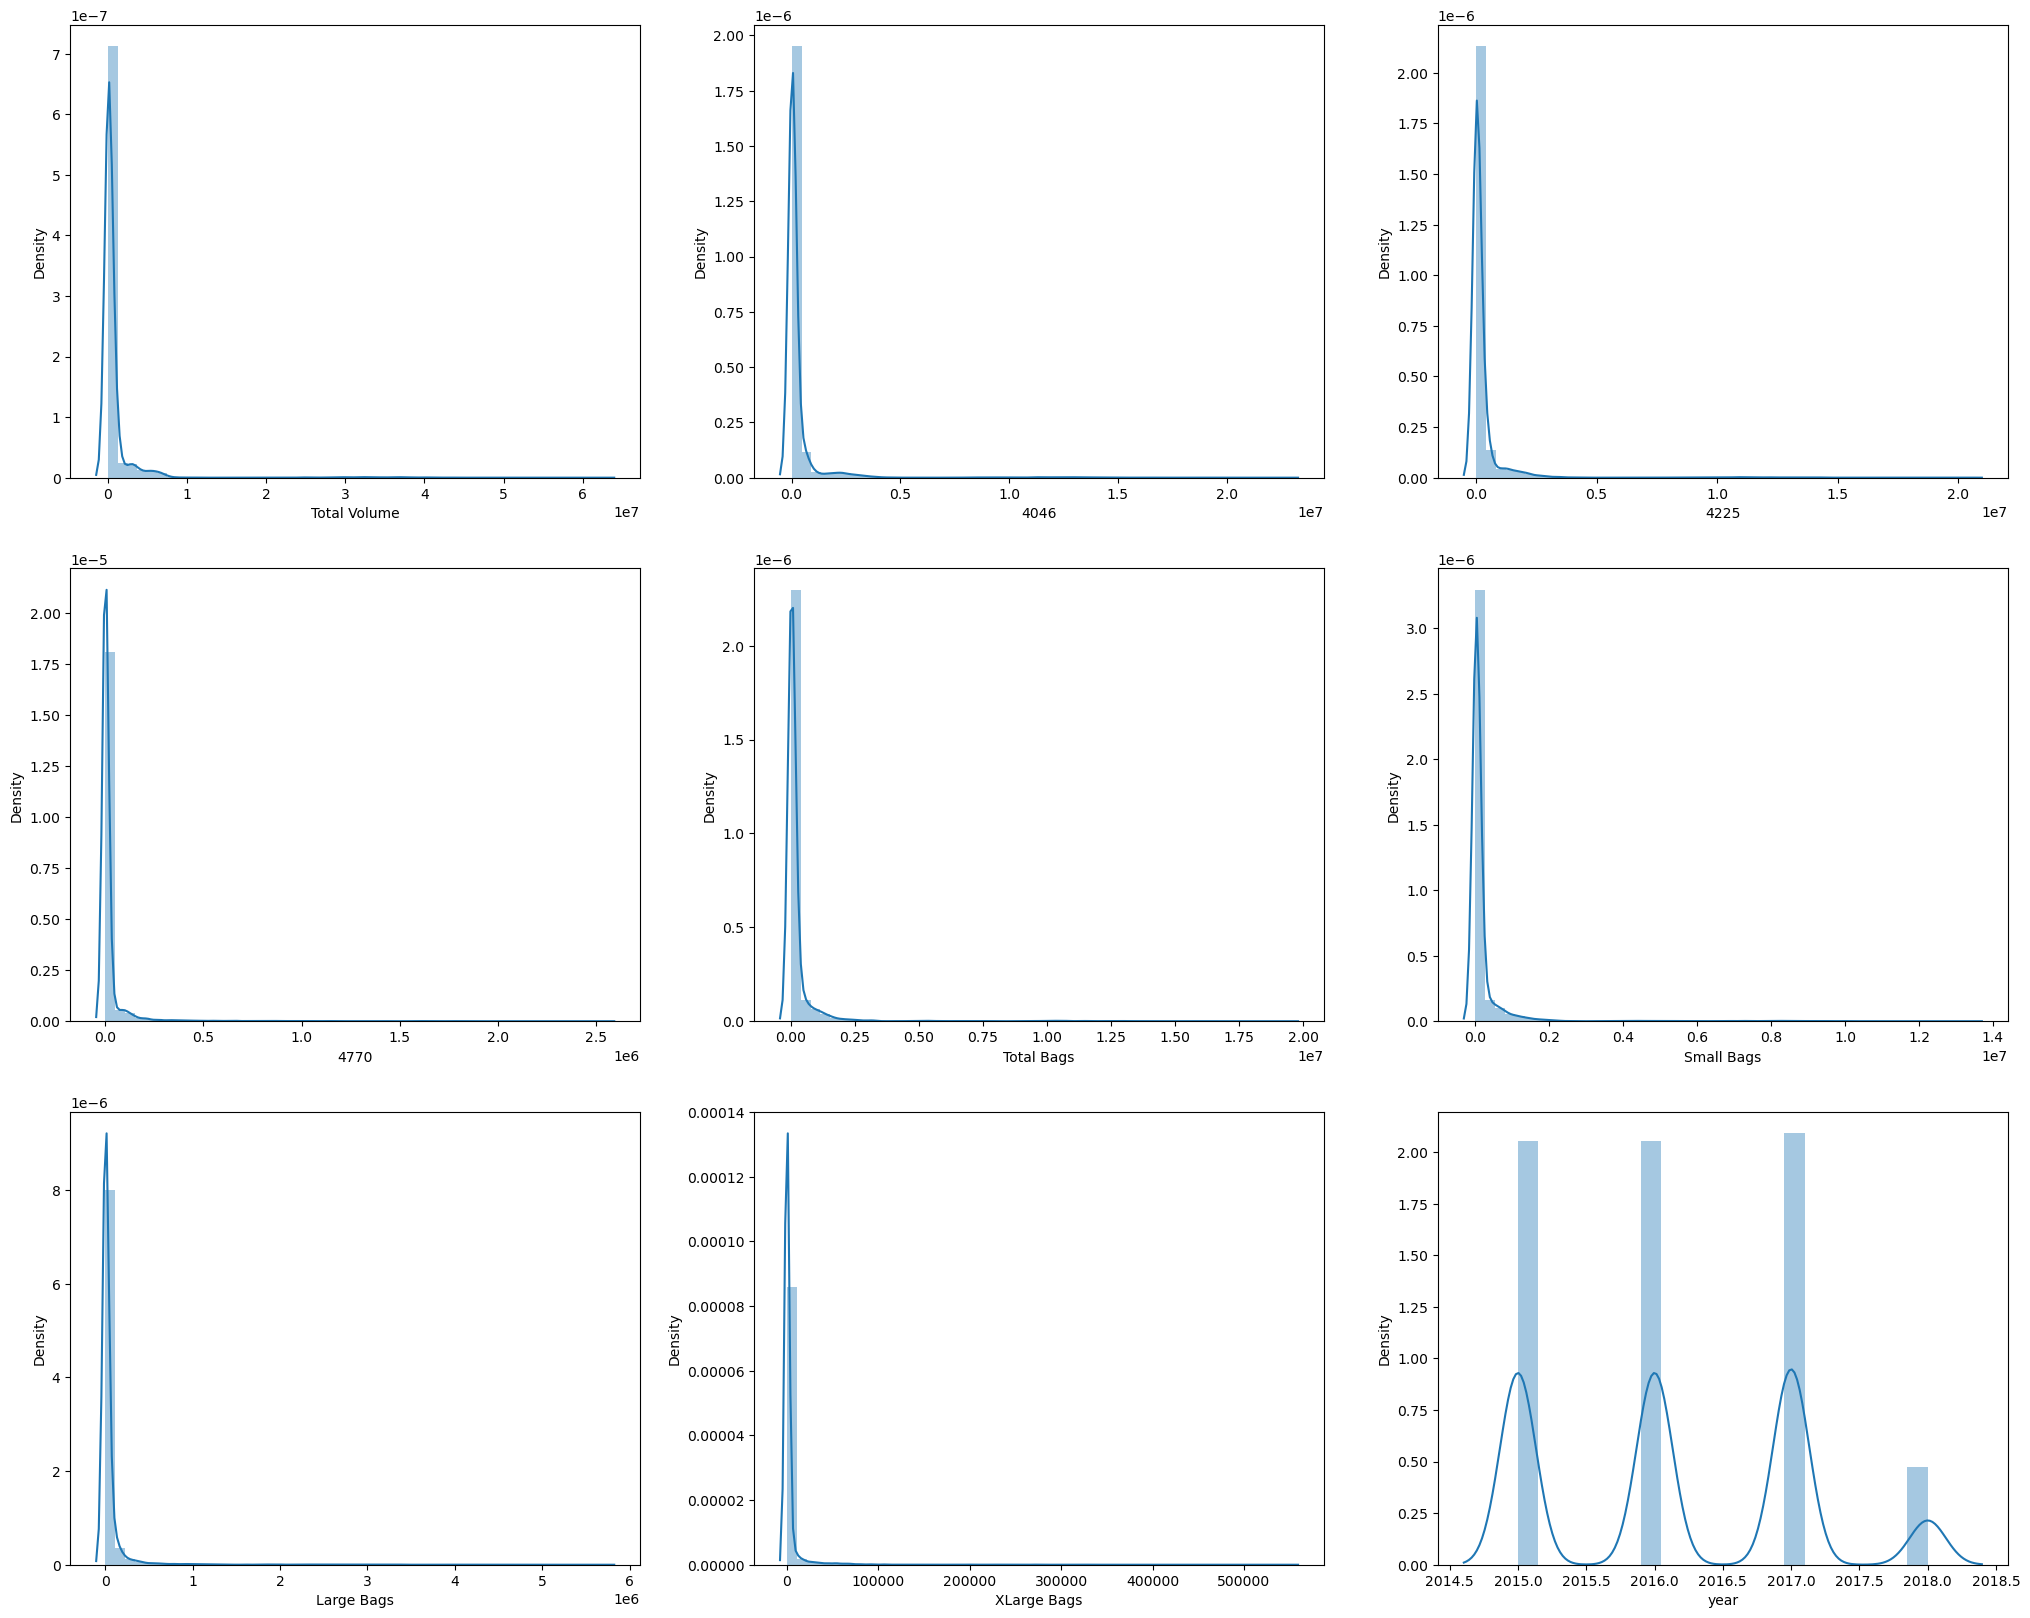

In [46]:
plt.figure(figsize=(25,20))

plotnumber = 1

for i in data[cont_data]:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(data[cont_data][i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()
    

all of the features are skewed

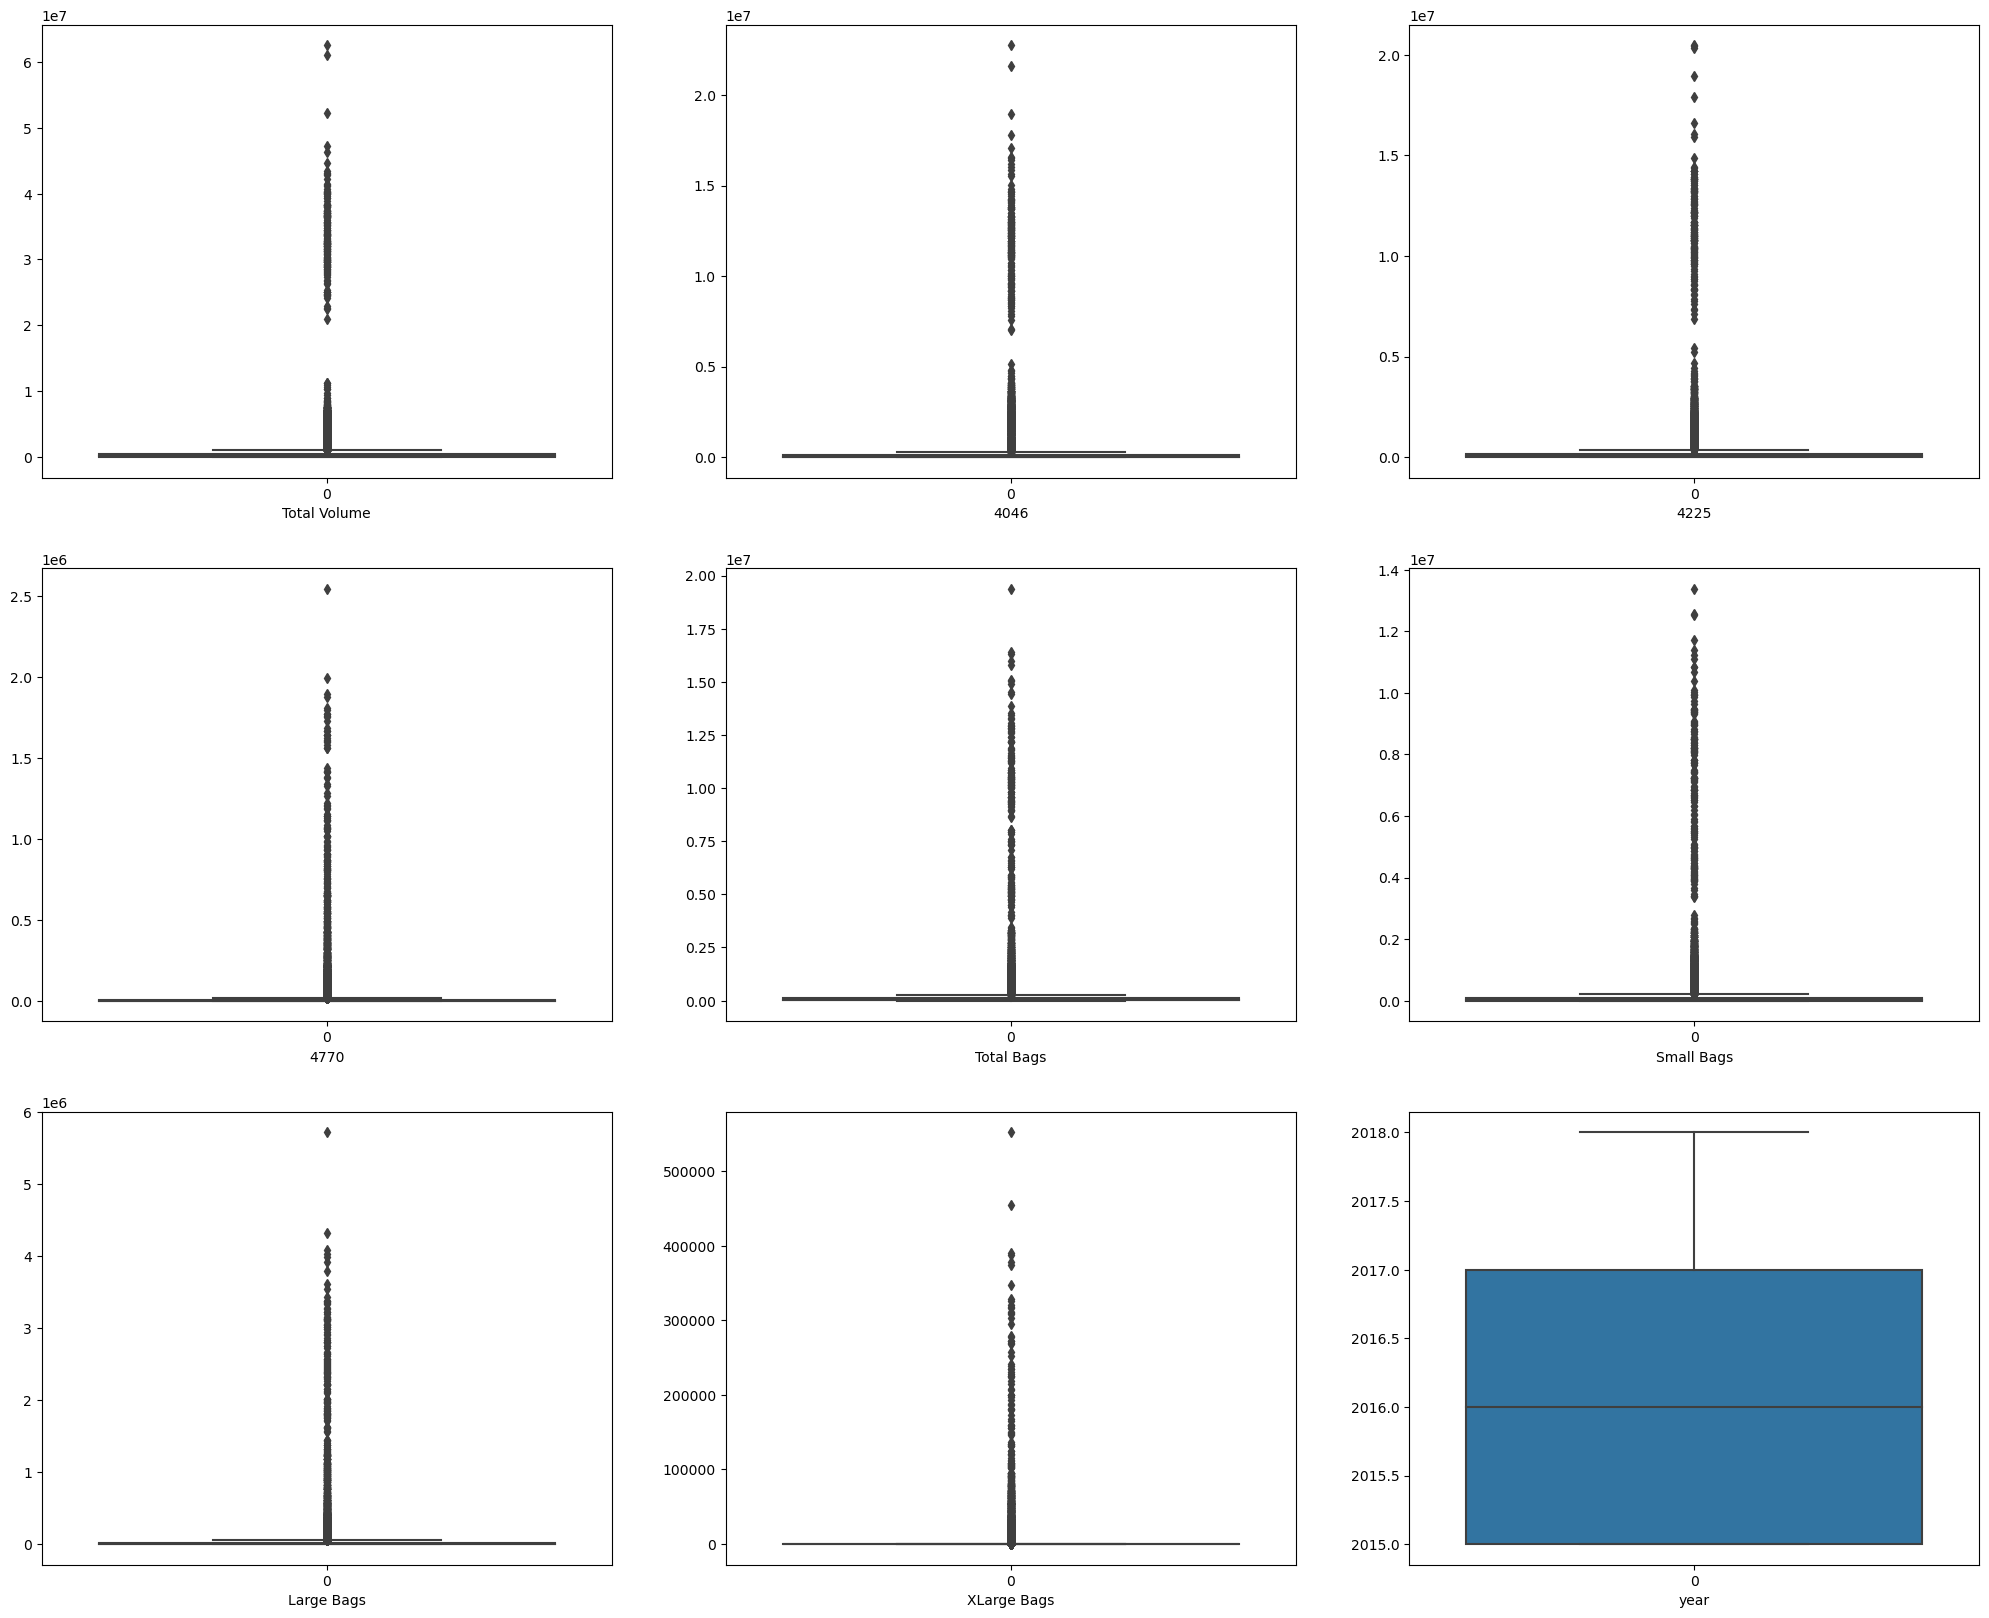

In [47]:
plt.figure(figsize=(25,20))

plotnumber = 1

for i in data[cont_data]:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.boxplot(data[cont_data][i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()
    

outliers are present in all of the data

# Removing outliers

In [48]:
z = zscore(data[cont_data])

In [49]:
data = data[(z<3).all(axis=1)]

In [50]:
data.shape

(17782, 13)

In [51]:
data_loss = (18249-17782)/18249

In [52]:
data_loss

0.0255904433119623

# Feature Selection

In [53]:
data.corr()['AveragePrice'].sort_values()

Total Volume   -0.328226
4046           -0.327348
Total Bags     -0.295100
Small Bags     -0.274138
Large Bags     -0.267604
4225           -0.243080
4770           -0.240676
XLarge Bags    -0.152351
year            0.099910
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

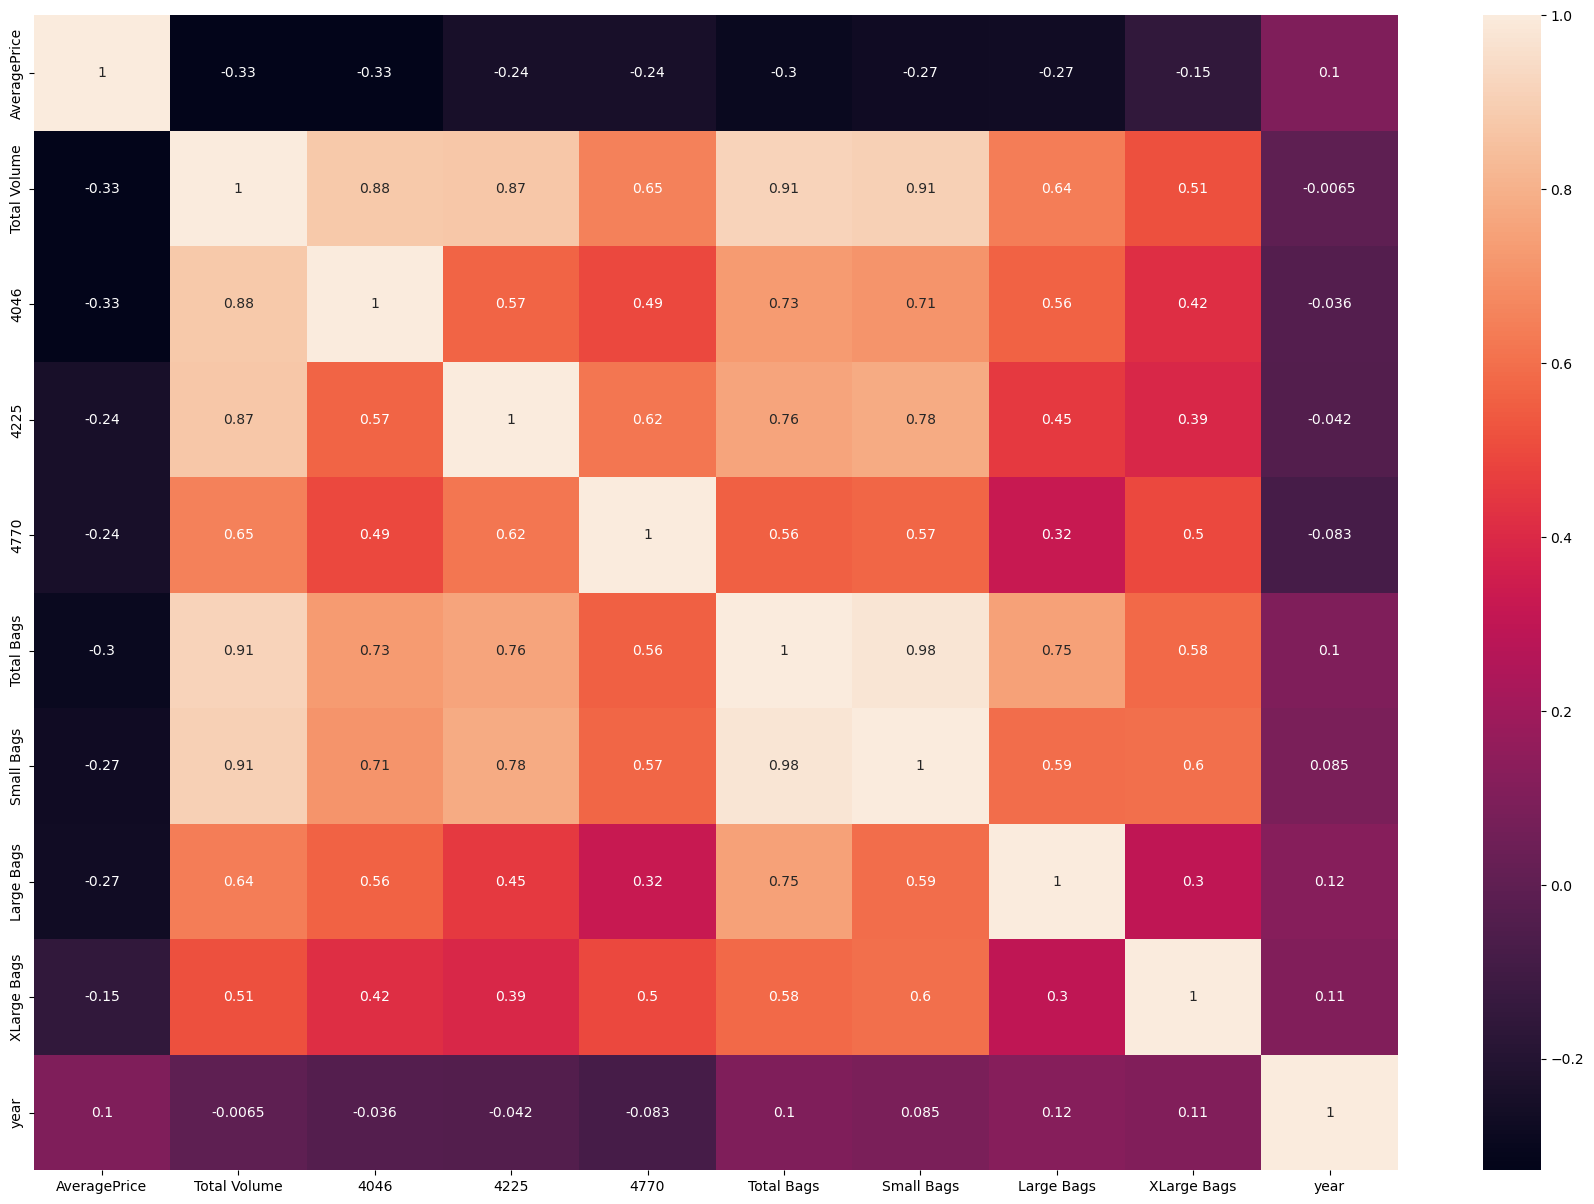

In [54]:
plt.figure(figsize=(22,15))

sns.heatmap(data.corr(),annot=True)

plt.show()

In [55]:
cat_data

['type', 'region', 'day of the week', 'month']

In [56]:
cat_data.remove('day of the week')

In [57]:
cat_data

['type', 'region', 'month']

In [58]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,December
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,December
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,December
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,December
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,November


In [59]:
X = data.drop(cat_data,axis=1)

y = data['AveragePrice']

In [60]:
X.drop('AveragePrice',axis=1,inplace=True)

In [61]:
X

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015
...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018


In [62]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17782, dtype: float64

In [63]:
mf = mutual_info_regression(X,y)

In [64]:
mf = pd.Series(mf)

mf.index = X.columns

mf.sort_values(ascending=False)

Total Volume    0.304837
4046            0.283798
Total Bags      0.269934
4225            0.238552
Small Bags      0.226292
4770            0.205751
Large Bags      0.173352
XLarge Bags     0.107423
year            0.041675
dtype: float64

selecting top 80% features

In [65]:
tten = SelectPercentile(mutual_info_regression,percentile=80)

tten.fit(X,y)

X.columns[tten.get_support()]

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags'],
      dtype='object')

In [66]:
a = X.columns[tten.get_support()]

In [67]:
A = list(a)

In [68]:
A

['Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags']

In [69]:
A = A + cat_data

In [70]:
x = data[A]

In [71]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,region,month
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,conventional,Albany,December
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,conventional,Albany,December
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,conventional,Albany,December
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,conventional,Albany,December
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,conventional,Albany,November


In [72]:
xx = pd.get_dummies(x[cat_data])

In [73]:
x = pd.concat([xx,x],axis=1)

In [74]:
x.head()

,type_conventional,type_organic,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,...,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,region,month
0,1,0,1,0,0,0,0,0,0,0,...,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,conventional,Albany,December
1,1,0,1,0,0,0,0,0,0,0,...,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,conventional,Albany,December
2,1,0,1,0,0,0,0,0,0,0,...,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,conventional,Albany,December
3,1,0,1,0,0,0,0,0,0,0,...,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,conventional,Albany,December
4,1,0,1,0,0,0,0,0,0,0,...,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,conventional,Albany,November


In [75]:
x.drop(cat_data,axis=1,inplace=True)

In [76]:
x.head()

,type_conventional,type_organic,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,...,month_November,month_October,month_September,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76
4,1,0,1,0,0,0,0,0,0,0,...,1,0,0,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69


# feature scaling

In [77]:
x.skew().sort_values()

type_organic           -0.052210
type_conventional       0.052210
month_January           2.552213
month_March             2.661901
month_February          2.786664
                         ...    
region_SouthCentral     7.610764
region_California       7.638302
region_GreatLakes       7.899434
region_West             8.153941
region_TotalUS         10.111666
Length: 75, dtype: float64

the values are highly skewed so applying power transformation

In [78]:
pt=PowerTransformer()

In [79]:
c = ['Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags']

In [80]:
x[c] = pt.fit_transform(x[c])

In [81]:
x.head()

,type_conventional,type_organic,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,...,month_November,month_October,month_September,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012
4,1,0,1,0,0,0,0,0,0,0,...,1,0,0,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755


In [82]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=9)

# Linear Regression

In [83]:
lr = LinearRegression()

In [84]:
lr.fit(x_train,y_train)

LinearRegression()

In [85]:
pred1 = lr.predict(x_train)

In [86]:
pred2 = lr.predict(x_test)

In [87]:
print(f"Training Score: {r2_score(y_train,pred1)}")

Training Score: 0.664683368973931


In [88]:
print(f"Test Score: {r2_score(y_test,pred2)}")

Test Score: 0.6750371295833648


In [89]:
a1 = r2_score(y_train,pred1)

In [90]:
a2 = r2_score(y_test,pred2)

In [91]:
cv = cross_val_score(lr,x,y)

a3 = cv.mean()

a3

0.11581978997647184

# LASSO

In [92]:
ls = Lasso()

In [93]:
ls.fit(x_train,y_train)

Lasso()

In [94]:
pred3 = ls.predict(x_train)

In [95]:
pred4 = ls.predict(x_test)

In [96]:
print(f"Training Score: {r2_score(y_train,pred3)}")

Training Score: 0.0


In [97]:
print(f"Test Score: {r2_score(y_test,pred4)}")

Test Score: -0.0025846585877735695


In [98]:
a4 = r2_score(y_train,pred3)

In [99]:
a5 = r2_score(y_test,pred4)

In [100]:
cv = cross_val_score(ls,x,y)

a6 = cv.mean()

a6

-1.2004309324076277

# RIDGE

In [101]:
ri = Ridge()

In [102]:
ri.fit(x_train,y_train)

Ridge()

In [103]:
pred5 = ri.predict(x_train)

In [104]:
pred6 = ri.predict(x_test)

In [105]:
print(f"Training Score: {r2_score(y_train,pred5)}")

Training Score: 0.6647309037779183


In [106]:
print(f"Test Score: {r2_score(y_test,pred6)}")

Test Score: 0.6747136113704476


In [107]:
a7 = r2_score(y_train,pred5)

In [108]:
a8 = r2_score(y_test,pred6)

In [109]:
cv = cross_val_score(ri,x,y)

a9 = cv.mean()

a9

0.1954445206008424

# KNN

In [110]:
knn = KNeighborsRegressor()

In [111]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [112]:
pred7 = knn.predict(x_train)

In [113]:
pred8 = knn.predict(x_test)

In [114]:
print(f"Training Score: {r2_score(y_train,pred7)}")

Training Score: 0.8515330363372327


In [115]:
print(f"Test Score: {r2_score(y_test,pred8)}")

Test Score: 0.724450066933533


In [116]:
a10 = r2_score(y_train,pred7)

In [117]:
a11 = r2_score(y_test,pred8)

In [118]:
cv = cross_val_score(knn,x,y)

a12 = cv.mean()

a12

-0.05467987968350709

# DT

In [119]:
dt = DecisionTreeRegressor()

In [120]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [121]:
pred9 = dt.predict(x_train)

In [122]:
pred10 = dt.predict(x_test)

In [123]:
print(f"Training Score: {r2_score(y_train,pred9)}")

Training Score: 1.0


In [124]:
print(f"Test Score: {r2_score(y_test,pred10)}")

Test Score: 0.6755277759965284


In [125]:
a13 = r2_score(y_train,pred9)

In [126]:
a14 = r2_score(y_test,pred10)

In [127]:
cv = cross_val_score(dt,x,y)

a15 = cv.mean()

a15

-0.36136402830079234

# Random Forest

In [128]:
rf = RandomForestRegressor()

In [129]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [130]:
pred11 = rf.predict(x_train)

In [131]:
pred12 = rf.predict(x_test)

In [132]:
print(f"Training Score: {r2_score(y_train,pred11)}")

Training Score: 0.9794323276687028


In [133]:
print(f"Test Score: {r2_score(y_test,pred12)}")

Test Score: 0.852055056257385


In [134]:
a16 = r2_score(y_train,pred11)

In [135]:
a17 = r2_score(y_test,pred12)

In [136]:
cv = cross_val_score(rf,x,y)

a18 = cv.mean()

a18

0.10258788998594397

# ADA

In [137]:
ada = AdaBoostRegressor()

In [138]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [139]:
pred13 = ada.predict(x_train)

In [140]:
pred14 = ada.predict(x_test)

In [141]:
print(f"Training Score: {r2_score(y_train,pred13)}")

Training Score: 0.4475836111694016


In [142]:
print(f"Test Score: {r2_score(y_test,pred14)}")

Test Score: 0.46601142431443365


In [143]:
a19 = r2_score(y_train,pred13)

In [144]:
a20 = r2_score(y_test,pred14)

In [145]:
cv = cross_val_score(ada,x,y)

a21 = cv.mean()

a21

-0.36216713911547976

# GBDT

In [146]:
gb = GradientBoostingRegressor()

In [147]:
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [148]:
pred15 = gb.predict(x_train)

In [149]:
pred16 = gb.predict(x_test)

In [150]:
print(f"Training Score: {r2_score(y_train,pred15)}")

Training Score: 0.6755466517046961


In [151]:
print(f"Test Score: {r2_score(y_test,pred16)}")

Test Score: 0.6622817277582848


In [152]:
a22 = r2_score(y_train,pred15)

In [153]:
a23 = r2_score(y_test,pred16)

In [154]:
cv = cross_val_score(gb,x,y)

a24 = cv.mean()

a24

0.18298387384341525

# XGBOOST

In [155]:
xg = XGBRegressor()

In [156]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [157]:
pred17 = xg.predict(x_train)

In [158]:
pred18 = xg.predict(x_test)

In [159]:
print(f"Training Score: {r2_score(y_train,pred17)}")

Training Score: 0.9229971438906135


In [160]:
print(f"Test Score: {r2_score(y_test,pred18)}")

Test Score: 0.8347854942522788


In [161]:
a25 = r2_score(y_train,pred17)

In [162]:
a26 = r2_score(y_test,pred18)

In [163]:
cv = cross_val_score(xg,x,y)

a27 = cv.mean()

a27

0.11118719797090179

# SVM

In [164]:
svm  = SVR()

In [165]:
svm.fit(x_train,y_train)

SVR()

In [166]:
pred19 = svm.predict(x_train)

In [167]:
pred20 = svm.predict(x_test)

In [168]:
print(f"Training Score: {r2_score(y_train,pred19)}")

Training Score: 0.8569100767652051


In [169]:
print(f"Test Score: {r2_score(y_test,pred20)}")

Test Score: 0.8201934853484978


In [170]:
a28 = r2_score(y_train,pred19)

In [171]:
a29 = r2_score(y_test,pred20)

In [172]:
cv = cross_val_score(svm,x,y)

a30 = cv.mean()

a30

0.20481856901580123

In [173]:
test = []

train = []

cv = []

In [174]:
model = ["LR",'LASSO','RIDGE','KNN','DT','RF','ADA','GBDT','XGBOOST','SVM']

In [175]:
train.append(a1)
test.append(a2)
cv.append(a3)

train.append(a4)
test.append(a5)
cv.append(a6)

train.append(a7)
test.append(a8)
cv.append(a9)

train.append(a10)
test.append(a11)
cv.append(a12)

train.append(a13)
test.append(a14)
cv.append(a15)

train.append(a16)
test.append(a17)
cv.append(a18)

train.append(a19)
test.append(a20)
cv.append(a21)

train.append(a22)
test.append(a23)
cv.append(a24)

train.append(a25)
test.append(a26)
cv.append(a27)

train.append(a28)
test.append(a29)
cv.append(a30)

In [176]:
result = pd.DataFrame({'MODEL NAME':model,"TRAINING SCORE":train,"TEST SCORE":test,"CV SCORE":cv})

In [177]:
result

,MODEL NAME,TRAINING SCORE,TEST SCORE,CV SCORE
0,LR,0.664683,0.675037,0.115820
1,LASSO,0.000000,-0.002585,-1.200431
2,RIDGE,0.664731,0.674714,0.195445
3,KNN,0.851533,0.724450,-0.054680
4,DT,1.000000,0.675528,-0.361364
5,RF,0.979432,0.852055,0.102588
6,ADA,0.447584,0.466011,-0.362167
7,GBDT,0.675547,0.662282,0.182984
8,XGBOOST,0.922997,0.834785,0.111187
9,SVM,0.856910,0.820193,0.204819


from the above results the SVM model performs better then any other model

# HYPER PARAMETER TUNING

In [178]:
para = {'C': [0.1, 1, 10, 100, 1000], 
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

In [179]:
gs = GridSearchCV(svm,para,n_jobs=-1)

In [180]:
gs.fit(x_train,y_train)

GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [181]:
gs.best_params_

{'C': 10, 'gamma': 0.1}

In [182]:
gs.best_estimator_.fit(x_train,y_train)

SVR(C=10, gamma=0.1)

In [183]:
trainpred = gs.best_estimator_.predict(x_train)

In [184]:
testpred = gs.best_estimator_.predict(x_test)

In [185]:
conclusion = pd.DataFrame({'Actual Values':y_test,"Predicted":testpred})

In [186]:
conclusion

,Actual Values,Predicted
4211,0.98,0.977880
9164,1.93,1.828807
17462,2.09,1.719496
13497,1.84,1.768758
2457,1.09,1.144909
...,...,...
8917,0.88,0.750531
3167,0.88,0.973313
2940,1.34,1.282216
14430,1.35,1.459910


In [187]:
print(f"Training Score: {r2_score(y_train,trainpred)}")

Training Score: 0.9133989302510507


In [188]:
print(f"Training Score: {r2_score(y_test,testpred)}")

Training Score: 0.8554934723649421


In [189]:
mean_absolute_error(y_test,testpred)

0.1094209452933246

In [190]:
mean_squared_error(y_test,testpred)

0.023835730304174046

model after hyper parameter tuning gives 91% train accuracy, 85% test accuracy

MAE and MSE for model are 0.10 and 0.02 respectively.

In [191]:
pickle.dump(gs.best_estimator_,open('avocado.pkl','wb'))

# 2. CLassification part

In [192]:
data = pd.read_csv('avocado.csv')

In [193]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [194]:
data['Date'] = pd.to_datetime(data['Date'])

In [195]:
wd_mapping = {0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'}

In [196]:
month_mapping = {1:'January',
                2:'February',
                3:'March',
                4:'April',
                5:'May',
                6:'June',
                7:'July',
                8:'August',
                9:'September',
                10:'October',
                11:'November',
                12:'December'}

In [197]:
data['day of the week'] = data['Date'].dt.weekday.map(wd_mapping)

In [198]:
data['month'] = data['Date'].dt.month.map(month_mapping)

In [199]:
data.drop('Date',axis=1,inplace=True)

In [200]:
data.drop_duplicates(inplace=True)

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AveragePrice     18249 non-null  float64
 1   Total Volume     18249 non-null  float64
 2   4046             18249 non-null  float64
 3   4225             18249 non-null  float64
 4   4770             18249 non-null  float64
 5   Total Bags       18249 non-null  float64
 6   Small Bags       18249 non-null  float64
 7   Large Bags       18249 non-null  float64
 8   XLarge Bags      18249 non-null  float64
 9   type             18249 non-null  object 
 10  year             18249 non-null  int64  
 11  region           18249 non-null  object 
 12  day of the week  18249 non-null  object 
 13  month            18249 non-null  object 
dtypes: float64(9), int64(1), object(4)
memory usage: 2.1+ MB


In [202]:
cat_data = data.select_dtypes('object').columns.tolist()

In [203]:
cont_data = data.select_dtypes(['int64','float64']).columns.tolist()

In [204]:
cat_data

['type', 'region', 'day of the week', 'month']

In [205]:
cont_data

['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'year']

In [206]:
#le = LabelEncoder()

In [207]:
#data['type'] = le.fit_transform(data['type'])

In [208]:
data['region'] = le.fit_transform(data['region'])

In [209]:
#data['day of the week'] = le.fit_transform(data['day of the week'])

In [210]:
#data['month'] = le.fit_transform(data['month'])

In [211]:
data.drop('day of the week',axis=1,inplace=True)

In [212]:
cat_data.remove('day of the week')

# Removing outliers

In [213]:
z = zscore(data[cont_data])

In [214]:
data = data[(z<3).all(axis=1)]

In [215]:
data_loss = (18249-17782)/18249

In [216]:
data_loss

0.0255904433119623

# Feature Selection

In [217]:
cat_data.remove('region')

In [218]:
cat_data

['type', 'month']

In [219]:
X = data.drop(cat_data,axis=1)

y = data['region']

In [220]:
X.drop('region',axis=1,inplace=True)

In [221]:
X

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018


In [222]:
mi = mutual_info_classif(X,y)

In [223]:
mi = pd.Series(mi)

mi.index = X.columns

mi.sort_values(ascending=False)

4046            1.208991
4225            1.205921
Total Volume    1.144050
4770            0.792802
Small Bags      0.681704
Total Bags      0.634811
Large Bags      0.500180
AveragePrice    0.250477
XLarge Bags     0.166856
year            0.000000
dtype: float64

In [224]:
bestf = SelectKBest(mutual_info_classif,k=7)

bestf.fit(X,y)

a = X.columns[bestf.get_support()]

In [225]:
a

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags'],
      dtype='object')

In [226]:
A = list(a)

In [227]:
A

['Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags']

In [228]:
A = A + cat_data

In [229]:
A

['Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'type',
 'month']

In [230]:
x = data[A]

In [231]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,month
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,conventional,December
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,conventional,December
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,conventional,December
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,conventional,December
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,conventional,November
...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,organic,February
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,organic,January
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,organic,January
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,organic,January


In [232]:
dd = pd.get_dummies(x[cat_data])

In [233]:
x = pd.concat([dd,x],axis=1)

In [234]:
x.head()

,type_conventional,type_organic,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,...,month_September,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,month
0,1,0,0,0,1,0,0,0,0,0,...,0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,conventional,December
1,1,0,0,0,1,0,0,0,0,0,...,0,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,conventional,December
2,1,0,0,0,1,0,0,0,0,0,...,0,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,conventional,December
3,1,0,0,0,1,0,0,0,0,0,...,0,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,conventional,December
4,1,0,0,0,0,0,0,0,0,0,...,0,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,conventional,November


In [235]:
x.columns

Index(['type_conventional', 'type_organic', 'month_April', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'type', 'month'],
      dtype='object')

In [236]:
c = ['Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags']

In [237]:
pt = PowerTransformer()

In [238]:
x[c] = pt.fit_transform(x[c])

In [239]:
x.drop(cat_data,axis=1,inplace=True)

In [240]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=66)

In [241]:
x_train.head()

,type_conventional,type_organic,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,...,month_November,month_October,month_September,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags
17052,0,1,0,0,0,0,0,0,0,0,...,0,0,0,-0.146240,-0.341656,-0.252517,-0.656614,0.178091,-1.195781,1.027725
13021,0,1,0,0,0,0,1,0,0,0,...,0,0,0,-1.464417,-0.526801,-1.786896,-0.610668,-1.346276,-1.056665,-1.624482
15492,0,1,0,0,0,0,0,0,0,0,...,0,1,0,-1.034427,-1.392040,-1.229063,-1.228986,-0.625078,-0.422633,-1.624482
13326,0,1,0,0,0,0,0,0,0,1,...,0,0,0,-0.807333,-0.764531,-0.409134,-1.228986,-0.804997,-0.855603,0.074596
10521,0,1,0,0,0,0,0,0,0,1,...,0,0,0,-1.298424,-1.078046,-0.690679,-0.039228,-1.545893,-1.305911,-0.646907


# LOGISTIC REGRESSION

In [242]:
lr = LogisticRegression()

In [243]:
lr.fit(x_train,y_train)

LogisticRegression()

In [244]:
pred1 = lr.predict(x_train)

In [245]:
pred2 = lr.predict(x_test)

In [246]:
print(f"Training accuracy: {accuracy_score(y_train,pred1)}")

Training accuracy: 0.4645184135977337


In [247]:
print(f"Test accuracy: {accuracy_score(y_test,pred2)}")

Test accuracy: 0.4463324837156613


In [248]:
a1 = accuracy_score(y_train,pred1)

In [249]:
a2 = accuracy_score(y_test,pred2)

In [250]:
print(confusion_matrix(y_test,pred2))

[[34  0  0 ...  0  0  0]
 [ 0 22  0 ...  0  0  0]
 [ 0  0 43 ...  0  0  2]
 ...
 [ 0  0  0 ... 32  0  0]
 [ 0  0  0 ...  0 47  0]
 [ 0  3  0 ...  0  0  7]]


In [251]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.52      0.53      0.53        64
           1       0.21      0.33      0.25        67
           2       0.54      0.56      0.55        77
           3       0.50      0.33      0.40        63
           4       0.41      0.44      0.43        59
           5       0.38      0.33      0.36        54
           6       0.66      0.79      0.72        57
           7       0.34      0.53      0.41        59
           8       0.71      0.76      0.73        70
           9       0.45      0.74      0.56        68
          10       0.23      0.08      0.12        76
          11       0.60      0.39      0.47        84
          12       0.33      0.35      0.34        68
          13       0.12      0.01      0.03        70
          14       0.43      0.37      0.40        59
          15       0.56      0.64      0.60        44
          16       0.37      0.35      0.36        69
          17       0.54    

In [252]:
cv = cross_val_score(lr,x,y)

a3 = cv.mean()

a3

0.3230961865083281

# KNN

In [253]:
knn = KNeighborsClassifier()

In [254]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [255]:
pred3 = knn.predict(x_train)

In [256]:
pred4 = knn.predict(x_test)

In [257]:
print(f"Training accuracy: {accuracy_score(y_train,pred3)}")

Training accuracy: 0.8445467422096318


In [258]:
print(f"Test accuracy: {accuracy_score(y_test,pred4)}")

Test accuracy: 0.6791277258566978


In [259]:
a4 = accuracy_score(y_train,pred3)

In [260]:
a5 = accuracy_score(y_test,pred4)

In [261]:
print(confusion_matrix(y_test,pred4))

[[56  0  0 ...  0  0  0]
 [ 0 41  0 ...  0  0  0]
 [ 0  0 69 ...  0  0  0]
 ...
 [ 0  0  0 ... 32  0  0]
 [ 0  0  0 ...  0 51  0]
 [ 0  4  0 ...  0  0 31]]


In [262]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.65      0.88      0.75        64
           1       0.53      0.61      0.57        67
           2       0.78      0.90      0.83        77
           3       0.56      0.60      0.58        63
           4       0.74      0.71      0.72        59
           5       0.59      0.61      0.60        54
           6       0.73      0.82      0.78        57
           7       0.62      0.81      0.70        59
           8       0.89      0.91      0.90        70
           9       0.63      0.71      0.67        68
          10       0.52      0.58      0.55        76
          11       0.80      0.79      0.79        84
          12       0.83      0.81      0.82        68
          13       0.53      0.44      0.48        70
          14       0.75      0.64      0.69        59
          15       0.84      0.86      0.85        44
          16       0.88      0.87      0.88        69
          17       0.72    

In [263]:
cv = cross_val_score(knn,x,y)

a6 = cv.mean()

a6

0.3991799384328044

# DT

In [264]:
dt = DecisionTreeClassifier()

In [265]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [266]:
pred5 = dt.predict(x_train)

In [267]:
pred6 = dt.predict(x_test)

In [268]:
print(f"Training accuracy: {accuracy_score(y_train,pred5)}")

Training accuracy: 1.0


In [269]:
print(f"Test accuracy: {accuracy_score(y_test,pred6)}")

Test accuracy: 0.7663551401869159


In [270]:
a7 = accuracy_score(y_train,pred5)

In [271]:
a8 = accuracy_score(y_test,pred6)

In [272]:
print(confusion_matrix(y_test,pred6))

[[44  0  0 ...  0  0  0]
 [ 0 49  0 ...  0  0  0]
 [ 0  0 68 ...  0  0  1]
 ...
 [ 0  0  0 ... 32  0  0]
 [ 0  0  0 ...  0 51  0]
 [ 0  0  1 ...  0  0 40]]


In [273]:
print(classification_report(y_test,pred6))

              precision    recall  f1-score   support

           0       0.79      0.69      0.73        64
           1       0.68      0.73      0.71        67
           2       0.94      0.88      0.91        77
           3       0.77      0.73      0.75        63
           4       0.87      0.88      0.87        59
           5       0.63      0.74      0.68        54
           6       0.96      0.96      0.96        57
           7       0.83      0.81      0.82        59
           8       0.93      0.91      0.92        70
           9       0.71      0.79      0.75        68
          10       0.60      0.61      0.60        76
          11       0.84      0.80      0.82        84
          12       0.92      0.87      0.89        68
          13       0.71      0.67      0.69        70
          14       0.71      0.59      0.65        59
          15       0.96      1.00      0.98        44
          16       0.89      0.96      0.92        69
          17       0.76    

In [274]:
cv = cross_val_score(dt,x,y)

a9 = cv.mean()

a9

0.5422970003441795

# RANDOM FOREST

In [275]:
rf = RandomForestClassifier()

In [276]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [277]:
pred7 = rf.predict(x_train)

In [278]:
pred8 = rf.predict(x_test)

In [279]:
print(f"Training accuracy: {accuracy_score(y_train,pred7)}")

Training accuracy: 1.0


In [280]:
print(f"Test accuracy: {accuracy_score(y_test,pred8)}")

Test accuracy: 0.8782214670065137


In [281]:
a10 = accuracy_score(y_train,pred7)

In [282]:
a11 = accuracy_score(y_test,pred8)

In [283]:
print(confusion_matrix(y_test,pred8))

[[56  0  0 ...  0  0  0]
 [ 0 55  0 ...  0  0  0]
 [ 0  0 71 ...  0  0  0]
 ...
 [ 0  0  0 ... 32  0  0]
 [ 0  0  0 ...  0 54  0]
 [ 0  0  0 ...  0  0 47]]


In [284]:
print(classification_report(y_test,pred8))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        64
           1       0.87      0.82      0.85        67
           2       0.96      0.92      0.94        77
           3       0.89      0.86      0.87        63
           4       0.90      0.92      0.91        59
           5       0.92      0.83      0.87        54
           6       0.95      1.00      0.97        57
           7       0.93      0.90      0.91        59
           8       0.96      0.99      0.97        70
           9       0.87      0.85      0.86        68
          10       0.84      0.86      0.85        76
          11       0.95      0.89      0.92        84
          12       0.99      0.97      0.98        68
          13       0.88      0.80      0.84        70
          14       0.91      0.83      0.87        59
          15       0.98      0.98      0.98        44
          16       0.93      0.99      0.96        69
          17       0.84    

In [285]:
cv = cross_val_score(rf,x,y)

a12 = cv.mean()

a12

0.6254052852797921

# ADA

In [286]:
ada = AdaBoostClassifier()

In [287]:
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [288]:
pred9 = ada.predict(x_train) 

In [289]:
pred10 = ada.predict(x_test)

In [290]:
print(f"Training accuracy: {accuracy_score(y_train,pred9)}")

Training accuracy: 0.0825070821529745


In [291]:
print(f"Test accuracy: {accuracy_score(y_test,pred10)}")

Test accuracy: 0.0736335315774568


In [292]:
a13 = accuracy_score(y_train,pred9)

In [293]:
a14 = accuracy_score(y_test,pred10)

In [294]:
print(confusion_matrix(y_test,pred10))

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0 18  0]
 [ 0  0  0 ...  2  0  0]]


In [295]:
print(classification_report(y_test,pred10))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        64
           1       0.00      0.00      0.00        67
           2       0.00      0.00      0.00        77
           3       0.00      0.00      0.00        63
           4       0.11      0.32      0.17        59
           5       0.00      0.00      0.00        54
           6       0.00      0.00      0.00        57
           7       0.00      0.00      0.00        59
           8       0.00      0.00      0.00        70
           9       0.00      0.00      0.00        68
          10       0.00      0.00      0.00        76
          11       0.19      0.39      0.26        84
          12       0.00      0.00      0.00        68
          13       0.00      0.00      0.00        70
          14       0.00      0.00      0.00        59
          15       0.00      0.00      0.00        44
          16       0.00      0.00      0.00        69
          17       0.11    

In [296]:
cv = cross_val_score(ada,x,y)

a15 = cv.mean()

a15

0.052915584587502194

# GBDT

In [297]:
gb = GradientBoostingClassifier()

In [298]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [299]:
pred11 = gb.predict(x_train)

In [300]:
pred12 = gb.predict(x_test)

In [301]:
a16 = accuracy_score(y_train,pred11)

In [302]:
a17 = accuracy_score(y_test,pred12)

In [303]:
print(f"Training accuracy: {accuracy_score(y_train,pred11)}")

Training accuracy: 0.9678470254957507


In [304]:
print(f"Test accuracy: {accuracy_score(y_test,pred12)}")

Test accuracy: 0.800339847068819


In [305]:
print(confusion_matrix(y_test,pred12))

[[53  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  1]
 [ 0  0 68 ...  0  0  0]
 ...
 [ 0  0  0 ... 31  1  0]
 [ 0  0  0 ...  0 52  0]
 [ 0  1  0 ...  0  0 44]]


In [306]:
print(classification_report(y_test,pred12))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82        64
           1       0.76      0.75      0.75        67
           2       0.96      0.88      0.92        77
           3       0.86      0.76      0.81        63
           4       0.81      0.80      0.80        59
           5       0.65      0.76      0.70        54
           6       1.00      0.95      0.97        57
           7       0.79      0.81      0.80        59
           8       0.97      0.97      0.97        70
           9       0.87      0.78      0.82        68
          10       0.70      0.76      0.73        76
          11       0.88      0.77      0.82        84
          12       0.93      0.91      0.92        68
          13       0.75      0.70      0.73        70
          14       0.75      0.73      0.74        59
          15       0.90      0.98      0.93        44
          16       0.93      0.97      0.95        69
          17       0.81    

In [307]:
cv = cross_val_score(gb,x,y)

a18 = cv.mean()

a18

0.5924348566280206

# XGBOOST

In [308]:
xg = XGBClassifier()

In [309]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [310]:
pred13 = xg.predict(x_train)

In [311]:
pred14 = xg.predict(x_test)

In [312]:
print(f"Training accuracy: {accuracy_score(y_train,pred13)}")

Training accuracy: 1.0


In [313]:
print(f"Test accuracy: {accuracy_score(y_test,pred14)}")

Test accuracy: 0.8459359954687058


In [314]:
a19 = accuracy_score(y_train,pred13)

In [315]:
a20 = accuracy_score(y_test,pred14)

In [316]:
print(confusion_matrix(y_test,pred14))

[[47  0  0 ...  0  0  0]
 [ 0 52  0 ...  0  0  1]
 [ 0  0 70 ...  0  0  0]
 ...
 [ 0  0  0 ... 32  0  0]
 [ 0  0  0 ...  0 51  0]
 [ 0  0  0 ...  0  0 49]]


In [317]:
print(classification_report(y_test,pred14))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        64
           1       0.84      0.78      0.81        67
           2       0.97      0.91      0.94        77
           3       0.92      0.89      0.90        63
           4       0.92      0.95      0.93        59
           5       0.75      0.81      0.78        54
           6       0.98      0.98      0.98        57
           7       0.91      0.88      0.90        59
           8       0.93      0.97      0.95        70
           9       0.86      0.91      0.89        68
          10       0.82      0.87      0.85        76
          11       0.88      0.86      0.87        84
          12       0.94      0.94      0.94        68
          13       0.85      0.76      0.80        70
          14       0.85      0.76      0.80        59
          15       0.93      0.98      0.96        44
          16       0.96      0.94      0.95        69
          17       0.83    

In [318]:
cv = cross_val_score(xg,x,y)

a21 = cv.mean()

a21

0.6112435947732868

# SVM

In [319]:
svm = SVC()

In [320]:
svm.fit(x_train,y_train)

SVC()

In [321]:
pred15 = svm.predict(x_train)

In [322]:
pred16 = svm.predict(x_test)

In [323]:
a22 = accuracy_score(y_train,pred15)

In [324]:
a23 = accuracy_score(y_test,pred16)

In [325]:
print(f"Training accuracy: {accuracy_score(y_train,pred15)}")

Training accuracy: 0.7736543909348442


In [326]:
print(f"Test accuracy: {accuracy_score(y_test,pred16)}")

Test accuracy: 0.7417162276975361


In [327]:
print(confusion_matrix(y_test,pred16))

[[61  0  0 ...  0  0  0]
 [ 0 37  0 ...  0  0  0]
 [ 0  0 71 ...  0  0  0]
 ...
 [ 0  0  0 ... 32  0  0]
 [ 0  0  0 ...  0 50  0]
 [ 0  1  2 ...  0  0 36]]


In [328]:
print(classification_report(y_test,pred16))

              precision    recall  f1-score   support

           0       0.66      0.95      0.78        64
           1       0.63      0.55      0.59        67
           2       0.90      0.92      0.91        77
           3       0.74      0.67      0.70        63
           4       0.75      0.68      0.71        59
           5       0.75      0.56      0.64        54
           6       0.93      0.95      0.94        57
           7       0.70      0.76      0.73        59
           8       0.93      1.00      0.97        70
           9       0.75      0.75      0.75        68
          10       0.60      0.64      0.62        76
          11       0.85      0.74      0.79        84
          12       0.88      0.94      0.91        68
          13       0.54      0.57      0.56        70
          14       0.79      0.71      0.75        59
          15       0.93      0.95      0.94        44
          16       0.93      0.91      0.92        69
          17       0.79    

In [329]:
cv = cross_val_score(svm,x,y)

a24 = cv.mean()

a24

0.5778133617020593

In [330]:
test = []
train = []
cv = []

In [331]:
model = ["LR","KNN",'DT','RF','ADA','GBDT','XGBOOST','SVM']

In [332]:
train.append(a1)
test.append(a2)
cv.append(a3)

train.append(a4)
test.append(a5)
cv.append(a6)

train.append(a7)
test.append(a8)
cv.append(a9)

train.append(a10)
test.append(a11)
cv.append(a12)

train.append(a13)
test.append(a14)
cv.append(a15)

train.append(a16)
test.append(a17)
cv.append(a18)

train.append(a19)
test.append(a20)
cv.append(a21)

train.append(a22)
test.append(a23)
cv.append(a24)


In [333]:
result = pd.DataFrame({'MODELS':model,"TRAIN SCORE":train,"TEST SCORE":test,"CV SCORE":cv})

In [334]:
result

,MODELS,TRAIN SCORE,TEST SCORE,CV SCORE
0,LR,0.464518,0.446332,0.323096
1,KNN,0.844547,0.679128,0.399180
2,DT,1.000000,0.766355,0.542297
3,RF,1.000000,0.878221,0.625405
4,ADA,0.082507,0.073634,0.052916
5,GBDT,0.967847,0.800340,0.592435
6,XGBOOST,1.000000,0.845936,0.611244
7,SVM,0.773654,0.741716,0.577813


from above all models SVM is performing best in classification 

# HYPERPARAMETER TUNING

In [335]:
svm = SVC(probability=True)

In [336]:
para = {'C': [0.1, 1, 10, 100, 1000], 
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

In [337]:
gs = GridSearchCV(svm,para,n_jobs=-1)

In [338]:
gs.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [339]:
gs.best_params_

{'C': 1000, 'gamma': 0.1}

In [340]:
gs.best_estimator_.fit(x_train,y_train)

SVC(C=1000, gamma=0.1, probability=True)

In [341]:
trainpred = gs.best_estimator_.predict(x_train)

In [342]:
testpred = gs.best_estimator_.predict(x_test)

In [343]:
testpred_prob = gs.best_estimator_.predict_proba(x_test)

In [344]:
print(f"Training accuracy: {accuracy_score(y_train,trainpred)}")

Training accuracy: 0.9778328611898017


In [345]:
print(f"Training accuracy: {accuracy_score(y_test,testpred)}")

Training accuracy: 0.8564146134239592


In [346]:
cv = cross_val_score(gs.best_estimator_,x,y)

cv_mean = cv.mean()

cv_mean

0.5978685748164978

In [347]:
pickle.dump(gs.best_estimator_,open('avocado_class.pkl','wb'))

the model after hyper parameter tuning gives 97% accuracy in test data and 85% accuracy in test data 

In [348]:
roc_auc_score(y_test,testpred_prob,multi_class='ovr')

0.9973002549568364

In [349]:
print(confusion_matrix(y_test,testpred))

[[54  0  0 ...  0  0  0]
 [ 0 56  0 ...  0  0  0]
 [ 0  0 74 ...  0  0  0]
 ...
 [ 0  0  0 ... 32  0  0]
 [ 0  0  0 ...  0 55  0]
 [ 0  0  2 ...  0  0 48]]


In [350]:
print(classification_report(y_test,testpred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        64
           1       0.90      0.84      0.87        67
           2       0.96      0.96      0.96        77
           3       0.83      0.79      0.81        63
           4       0.89      0.93      0.91        59
           5       0.70      0.80      0.75        54
           6       0.97      1.00      0.98        57
           7       0.84      0.95      0.89        59
           8       0.95      1.00      0.97        70
           9       0.72      0.85      0.78        68
          10       0.80      0.83      0.81        76
          11       0.93      0.88      0.90        84
          12       0.91      0.94      0.93        68
          13       0.89      0.67      0.76        70
          14       0.81      0.78      0.79        59
          15       0.98      1.00      0.99        44
          16       0.96      0.97      0.96        69
          17       0.85    

In [351]:
conclusion =pd.DataFrame({'Original':y_test,"Predicted":testpred})

In [352]:
conclusion

,Original,Predicted
11117,38,37
9426,5,49
15390,12,12
64,1,1
5240,46,46
...,...,...
14508,49,49
14316,45,45
17960,29,29
5559,52,52
